In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadroshaanriaz/students-performance-dataset-cleaned")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/students-performance-dataset-cleaned


In [2]:
import pandas as pd
import numpy as np

In [3]:
# Defining path and asigning data frame to it 

file_path = f"{path}/Cleaned_Students_Performance.csv"
students_data = pd.read_csv(file_path)

In [4]:
print(students_data.head())

   gender race_ethnicity parental_level_of_education  lunch  \
0       0        group B           bachelor's degree      1   
1       0        group C                some college      1   
2       0        group B             master's degree      1   
3       1        group A          associate's degree      0   
4       1        group C                some college      1   

   test_preparation_course  math_score  reading_score  writing_score  \
0                        0          72             72             74   
1                        1          69             90             88   
2                        0          90             95             93   
3                        0          47             57             44   
4                        0          76             78             75   

   total_score  average_score  
0          218      72.666667  
1          247      82.333333  
2          278      92.666667  
3          148      49.333333  
4          229      76.33333

In [5]:
# Checking general info about the dataset
print(students_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.2+ KB
None


In [6]:
# Distribution of race/ethnicity
print(students_data['race_ethnicity'].value_counts())

# Distribution of parental education levels
print(students_data['parental_level_of_education'].value_counts())

# Distribution of test preparation course
print(students_data['test_preparation_course'].value_counts())


race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
test_preparation_course
0    642
1    358
Name: count, dtype: int64


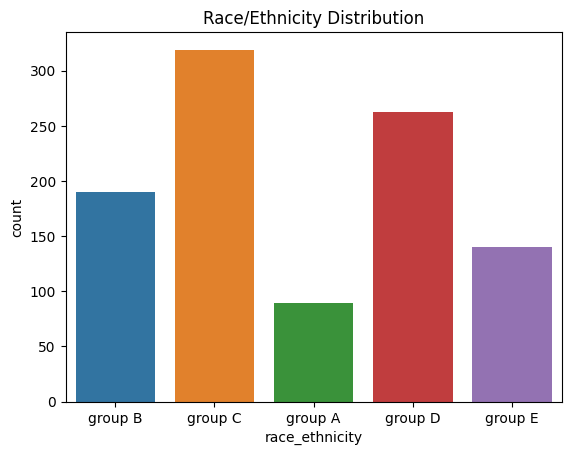

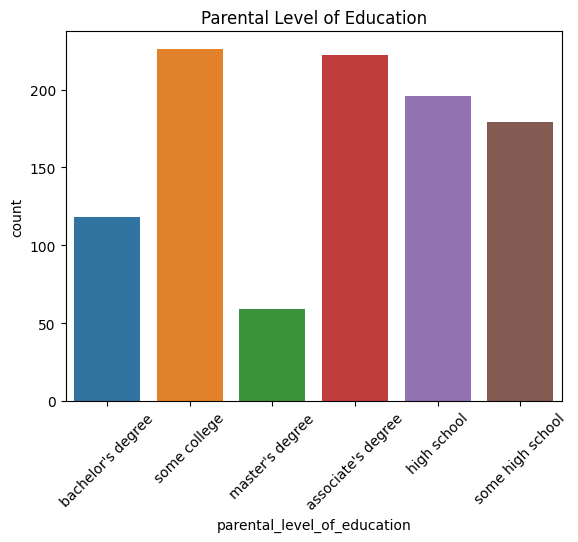

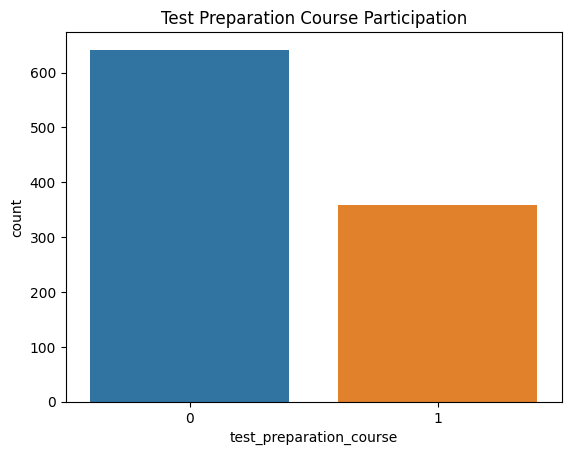

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='race_ethnicity', data=students_data)
plt.title('Race/Ethnicity Distribution')
plt.show()

sns.countplot(x='parental_level_of_education', data=students_data)
plt.title('Parental Level of Education')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='test_preparation_course', data=students_data)
plt.title('Test Preparation Course Participation')
plt.show()

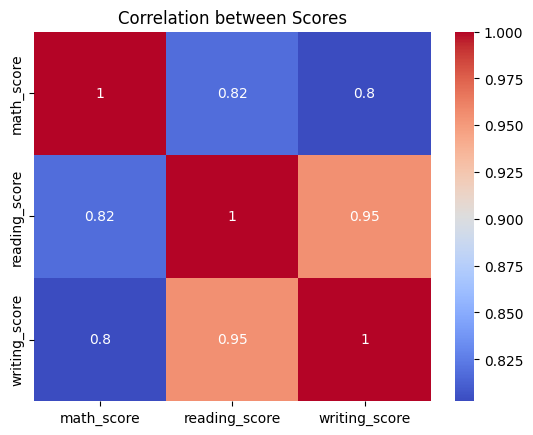

In [8]:
# Correlation between the scores
correlation = students_data[['math_score', 'reading_score', 'writing_score']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Scores')
plt.show()

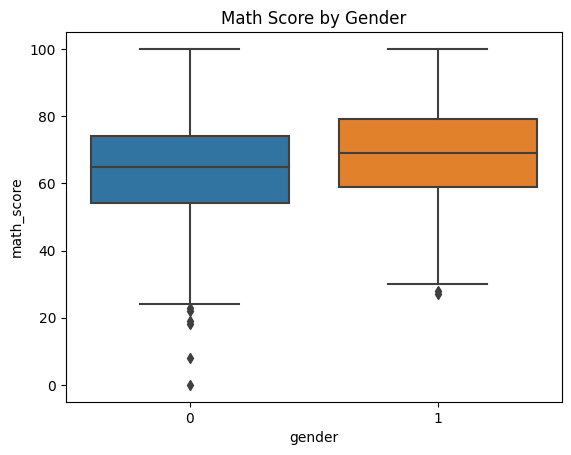

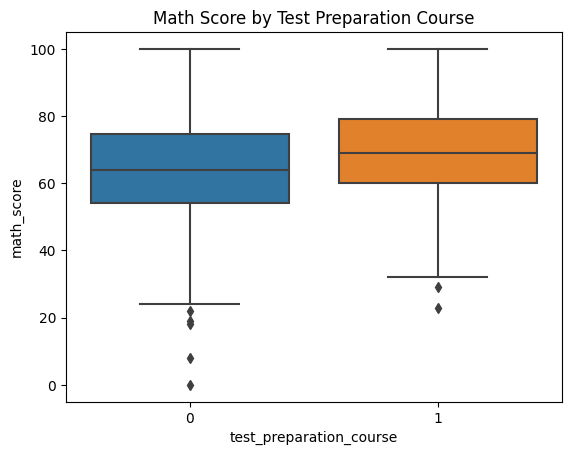

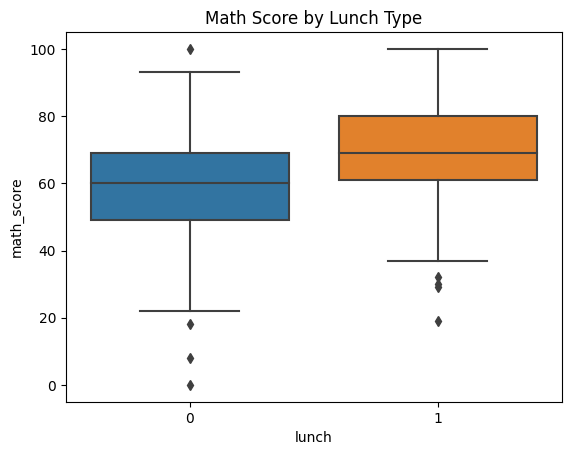

In [9]:
sns.boxplot(x='gender', y='math_score', data=students_data)
plt.title('Math Score by Gender')
plt.show()

sns.boxplot(x='test_preparation_course', y='math_score', data=students_data)
plt.title('Math Score by Test Preparation Course')
plt.show()

sns.boxplot(x='lunch', y='math_score', data=students_data)
plt.title('Math Score by Lunch Type')
plt.show()

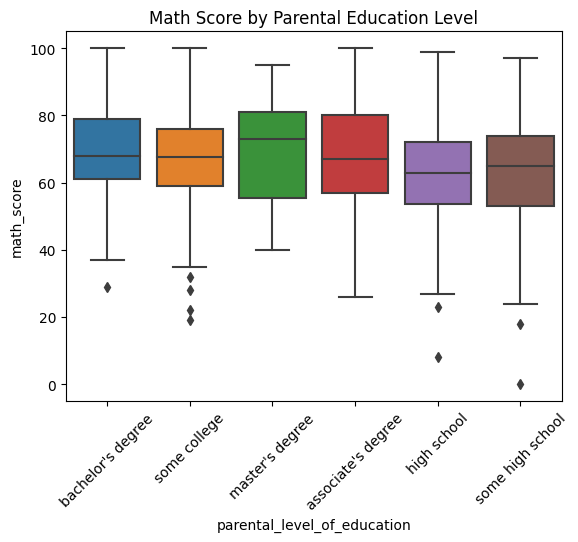

In [10]:
sns.boxplot(x='parental_level_of_education', y='math_score', data=students_data)
plt.title('Math Score by Parental Education Level')
plt.xticks(rotation=45)
plt.show()

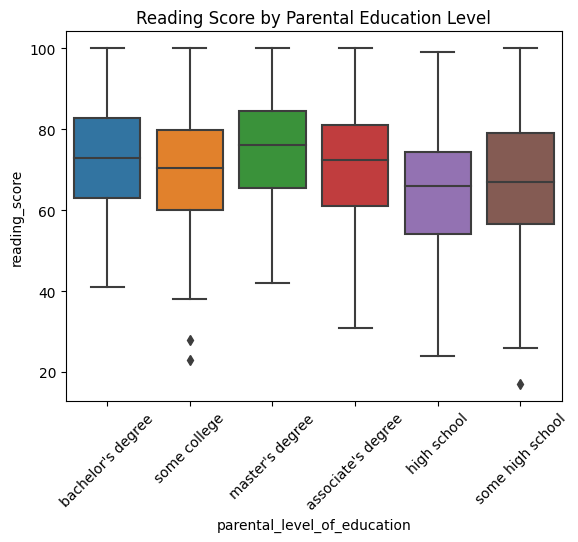

In [11]:
sns.boxplot(x='parental_level_of_education', y='reading_score', data=students_data)
plt.title('Reading Score by Parental Education Level')
plt.xticks(rotation=45)
plt.show()

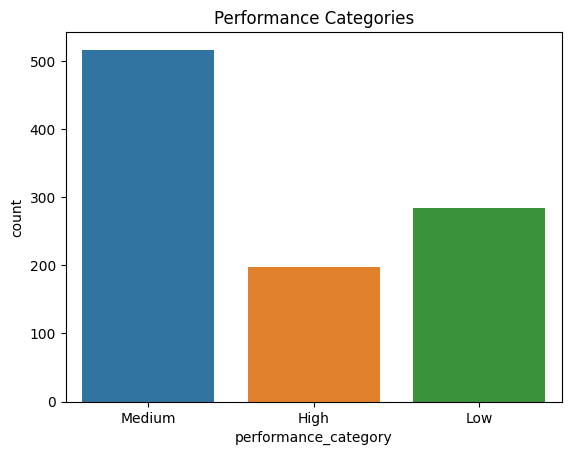

In [12]:
students_data['performance_category'] = students_data['average_score'].apply(
    lambda x: 'High' if x >= 80 else ('Medium' if x >= 60 else 'Low')
)
sns.countplot(x='performance_category', data=students_data)
plt.title('Performance Categories')
plt.show()